# 🖥 Exercise: Perceptron Implementation on MNIST Dataset

## 🎯 Learning Objective
- Learn how to **load, preprocess, and handle real-world data** (MNIST handwritten digits).  
- Understand the **Perceptron algorithm** for multi-class classification.  
- Visualize the effect of **weights and biases** on predictions.  

---

## 🍎 Real-Life Analogy

Imagine you are teaching a **robot teacher** 🤖 to recognize handwritten digits submitted by students.  
- Each input image is like a **student’s handwriting sample**.  
- The robot starts with random guesses (weights and bias) for each digit.  
- Using **Perceptron learning**, the robot **corrects itself** whenever it misclassifies a digit — just like a teacher giving feedback after a wrong answer.  

---

## 🧩 Dataset Overview
- Dataset: **MNIST** (handwritten digits 0–9)  
- Input: 28×28 grayscale image → flattened to 784 features  
- Output: 10 classes (digits 0–9)  
- Training set: 60,000 samples  
- Test set: 10,000 samples


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


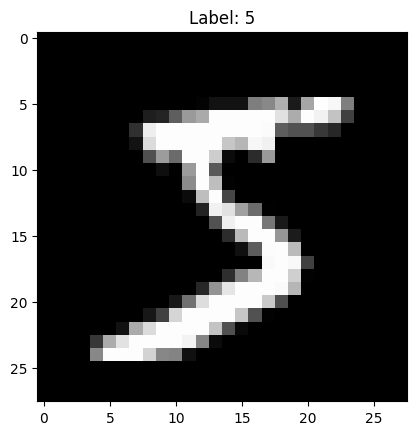

In [1]:
# --------------------------
# 1. Load and Explore MNIST
# --------------------------
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize images to [0,1]
X_train = X_train.reshape(-1, 28*28) / 255.0
X_test = X_test.reshape(-1, 28*28) / 255.0

# Check sample
plt.imshow(X_train[0].reshape(28,28), cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()


## 🧠 Perceptron Algorithm Overview

- **Weights**: w (size 784×10)  
- **Biases**: b (size 1×10)  
- **Activation**: Step function → outputs 1 if weighted sum ≥ 0, else 0  
- **Loss**: Misclassification error (update weights when prediction != target)  

We will implement a **simple multi-class Perceptron** using one-hot encoding.


In [2]:
# --------------------------
# 2. Helper Functions
# --------------------------
def one_hot(labels, num_classes=10):
    return np.eye(num_classes)[labels]

def step(x):
    return np.where(x >= 0, 1, 0)

# --------------------------
# 3. Initialize Weights & Bias
# --------------------------
num_features = X_train.shape[1]
num_classes = 10
np.random.seed(42)
W = np.random.randn(num_features, num_classes) * 0.01
b = np.zeros((1, num_classes))

# --------------------------
# 4. Perceptron Training
# --------------------------
y_train_onehot = one_hot(y_train, num_classes)
learning_rate = 0.01
epochs = 5  # small number for demonstration

for epoch in range(epochs):
    for i in range(len(X_train)):
        x = X_train[i].reshape(1, -1)           # 1x784
        y_true = y_train_onehot[i].reshape(1,-1) # 1x10

        # Forward pass
        z = np.dot(x, W) + b
        y_pred = step(z)

        # Weight update
        W += learning_rate * x.T.dot(y_true - y_pred)
        b += learning_rate * (y_true - y_pred)

    # Print progress
    if epoch % 1 == 0:
        print(f"Epoch {epoch+1}/{epochs} completed")


Epoch 1/5 completed
Epoch 2/5 completed
Epoch 3/5 completed
Epoch 4/5 completed
Epoch 5/5 completed


## ✅ Evaluate Model (on Test Set)

- For each test image, compute prediction using trained weights.  
- Calculate **accuracy** by comparing predicted label vs. true label.


In [3]:
# --------------------------
# 5. Model Evaluation
# --------------------------
y_test_onehot = one_hot(y_test, num_classes)
y_pred_test = step(np.dot(X_test, W) + b)
y_pred_labels = np.argmax(y_pred_test, axis=1)

accuracy = np.mean(y_pred_labels == y_test)
print(f"Perceptron Test Accuracy: {accuracy*100:.2f}%")


Perceptron Test Accuracy: 77.84%
